In [9]:
# Import library
import time
import metis
import torch
import torch_geometric
import networkx as nx
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook

# Inline command
%matplotlib inline

In [ ]:
# Load dataset library
from torch_geometric.datasets import Reddit
# Download dataset
dataset = Reddit(root='./datasets/Reddit')

In [3]:
# Load dataset library
from torch_geometric.datasets import Planetoid
# Download dataset
dataset = Planetoid(root='./datasets/Cora', name='Cora')

Processing...
Done!


In [12]:
# Load dataset library
from torch_geometric.datasets import KarateClub
# Download dataset
dataset = KarateClub()

In [13]:
# Print dataset information
print('Dataset: {}'.format(dataset))
print('===========================')
print('Number of graphs: {}'.format(len(dataset)))
print('Number of features: {}'.format(dataset.num_features))
print('Number of classes: {}'.format(dataset.num_classes))

Dataset: KarateClub()
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [14]:
# Print dataset detailed information
graph_data = dataset[0]
print('Graph details')
print('===========================')
print('Number of nodes: {}'.format(graph_data.num_nodes))
print('Number of edges: {}'.format(graph_data.num_edges))
print('Average node degree: {:.2f}'.format(graph_data.num_edges / graph_data.num_nodes))
print('Number of training nodes: {}'.format(graph_data.train_mask.sum()))
print('Training node label rate: {:.2f}'.format(int(graph_data.train_mask.sum()) / graph_data.num_nodes))
print('Contains isolated nodes: {}'.format(graph_data.has_isolated_nodes()))
print('Contains self loops: {}'.format(graph_data.has_self_loops()))
print('Is undirected: {}'.format(graph_data.is_undirected()))

Graph details
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Number of training nodes: 4
Training node label rate: 0.12
Contains isolated nodes: False
Contains self loops: False
Is undirected: True


In [15]:
# Helper function for visualizing graph data
def graph_visualize(graph, color, epoch=None, loss=None):
    # Define plot properties
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    
    # Check whether input is in tensor or NX graph representation
    if (torch.is_tensor(graph)):
        # Convert tensor to numpy
        graph = graph.detach().cpu().numpy()
        # Create scatter plot
        plt.scatter(graph[:, 0], graph[:, 0], s=140, c=color, cmap='Set2')
        # Print additional label
        if ((epoch is not None) and (loss is not None)):
            plt.xlabel('Epoch: {}, Loss: {:.4f}'.format(epoch, loss.item()), fontsize=16)
    else:
        nx.draw_networkx(graph, pos=nx.spring_layout(graph, seed=42), with_labels=False,
                         node_color=color, cmap='Set2')
    
    # Show graph
    plt.show()

In [16]:
# Convert tensor dataset to networkx
from torch_geometric.utils.convert import to_networkx
print("[Status] Converting graph from tensor to networkX")
nx_graph_data = to_networkx(graph_data)

# Partition graph
print("[Status] Partitioning graph using metis")
(edgecuts, parts) = metis.part_graph(nx_graph_data, 3)

# Set color
colors = ['red','blue','green']

# Create color map
print("[Status] Assigning color map for each subgraph")
color_map = []
for i, p in tqdm_notebook(enumerate(parts)):
    color_map.append(colors[p])

[Status] Converting graph from tensor to networkX
[Status] Partitioning graph using metis
[Status] Assigning color map for each subgraph


0it [00:00, ?it/s]

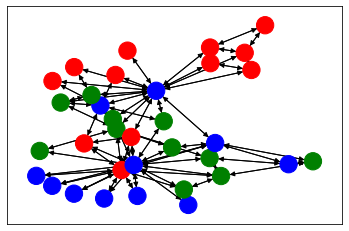

In [17]:
# Draw graph
nx.draw_networkx(nx_graph_data, pos=nx.spring_layout(nx_graph_data, seed=42), with_labels=False,
                         node_color=color_map, cmap='Set2')

In [18]:
clusters = list(set(parts))

In [19]:
print(clusters)

[0, 1, 2]


In [20]:
cluster_membership = {node: membership for node, membership in enumerate(parts)}

In [21]:
print(cluster_membership)

{0: 1, 1: 1, 2: 2, 3: 2, 4: 0, 5: 0, 6: 0, 7: 2, 8: 0, 9: 2, 10: 0, 11: 0, 12: 0, 13: 2, 14: 1, 15: 1, 16: 0, 17: 0, 18: 1, 19: 2, 20: 1, 21: 0, 22: 1, 23: 2, 24: 1, 25: 2, 26: 1, 27: 2, 28: 2, 29: 2, 30: 0, 31: 1, 32: 0, 33: 1}


In [25]:
for node, membership in enumerate(parts):
    print('{} - {}'.format(node, membership))

0 - 1
1 - 1
2 - 2
3 - 2
4 - 0
5 - 0
6 - 0
7 - 2
8 - 0
9 - 2
10 - 0
11 - 0
12 - 0
13 - 2
14 - 1
15 - 1
16 - 0
17 - 0
18 - 1
19 - 2
20 - 1
21 - 0
22 - 1
23 - 2
24 - 1
25 - 2
26 - 1
27 - 2
28 - 2
29 - 2
30 - 0
31 - 1
32 - 0
33 - 1
